# Data Understanding

Source: [KDD data mining cup 2013 - shopping cart abandonment prediction](https://www.data-mining-cup.com/reviews/dmc-2013/)

## Data Dictionary

- sessionNo: running number of the session
- startHour: hour in which the session has begun
- startWeekday: day of week in which the session has begun (1: Mon, 2: Tue, ..., 7: Sun)
- duration: time in seconds passed since start of the session
- cCount: number of the products clicked on
- cMinPrice: lowest price of a product clicked on
- cMaxPrice: highest price of a product clicked on
- cSumPrice: sum of the prices of all products clicked on
- bCount: number of products put in the shopping basket
- bMinPrice: lowest price of all products put in the shopping basket
- bMaxPrice: highest price of all products put in the shopping basket
- bSumPrice: sum of theprices of all products put in the shopping basket
- bStep: purchase processing step (1,2,3,4,5)
- onlineStatus: indication whether the customer is online
- availability: delivery status
- customerID: customer ID
- maxVal: maximum admissible purchase price for the customer
- customerScore: customer evaluation from the point of view of the shop
- accountLifetime: lifetime of the customer's account in months
- payments: number of payments affected by the customer
- age: age of the customer
- address: form of address of the customer (1: Mr, 2: Mrs, 3: company)
- lastOrder: time in days passed since the last order
- order: outcome of the session (y: purchase, n: non-purchase)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

sns.set_context('talk')

In [2]:
input_train_path = os.path.join(
    '..',
    'dataset',
    'transact_train.txt'
)

In [3]:
df_train = pd.read_csv(input_train_path, sep="|")
df_train.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,?,1,600,70,21,1,43,1,49,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
3,2,6,5,0.000,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y
4,2,6,5,15.633,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y


In [4]:
df_train.shape

(429013, 24)

In [5]:
df_train.iloc[0]

sessionNo              1
startHour              6
startWeekday           5
duration             0.0
cCount                 1
cMinPrice          59.99
cMaxPrice          59.99
cSumPrice          59.99
bCount                 1
bMinPrice          59.99
bMaxPrice          59.99
bSumPrice          59.99
bStep                  ?
onlineStatus           ?
availability           ?
customerNo             1
maxVal               600
customerScore         70
accountLifetime       21
payments               1
age                   43
address                1
lastOrder             49
order                  y
Name: 0, dtype: object

In [6]:
df_train.dtypes

sessionNo            int64
startHour            int64
startWeekday         int64
duration           float64
cCount               int64
cMinPrice           object
cMaxPrice           object
cSumPrice           object
bCount               int64
bMinPrice           object
bMaxPrice           object
bSumPrice           object
bStep               object
onlineStatus        object
availability        object
customerNo          object
maxVal              object
customerScore       object
accountLifetime     object
payments            object
age                 object
address             object
lastOrder           object
order               object
dtype: object

In [7]:
df_train.describe()

,sessionNo,startHour,startWeekday,duration,cCount,bCount
count,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000
mean,25274.631293,14.617061,5.924839,1573.901640,24.140317,4.135168
std,14441.366146,4.485914,0.790930,2427.123356,30.398164,4.451778
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,12731.000000,11.000000,5.000000,225.070000,5.000000,1.000000
50%,25470.000000,15.000000,6.000000,738.199000,13.000000,3.000000
75%,37542.000000,18.000000,7.000000,1880.265000,31.000000,5.000000
max,50000.000000,23.000000,7.000000,21580.092000,200.000000,108.000000


No columns have missing values. However, it may contain `?`.

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        429013 non-null  object 
 6   cMaxPrice        429013 non-null  object 
 7   cSumPrice        429013 non-null  object 
 8   bCount           429013 non-null  int64  
 9   bMinPrice        429013 non-null  object 
 10  bMaxPrice        429013 non-null  object 
 11  bSumPrice        429013 non-null  object 
 12  bStep            429013 non-null  object 
 13  onlineStatus     429013 non-null  object 
 14  availability     429013 non-null  object 
 15  customerNo       429013 non-null  object 
 16  maxVal           429013 non-null  obje

In [9]:
df_train['startWeekday'].unique()

array([5, 6, 7])

In [10]:
df_train['startHour'].unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23,  0,  1,  2,  3,  4,  5])

## Reformat data types + handle missing values

In [11]:
for col in df_train.columns:
    print(f"Preview of {col} - there are {df_train[col].nunique():,} unique values.")
    print(sorted(df_train[col].unique()[-5:]))
    print("--------------------------------")
    
    ## replace missing value with a numeric value, e.g., -99
    mask = (df_train[col] == '?')
    df_train.loc[mask, col] = -99

Preview of sessionNo - there are 50,000 unique values.
[49996, 49997, 49998, 49999, 50000]
--------------------------------
Preview of startHour - there are 24 unique values.
[1, 2, 3, 4, 5]
--------------------------------
Preview of startWeekday - there are 3 unique values.
[5, 6, 7]
--------------------------------
Preview of duration - there are 369,334 unique values.
[675.114, 715.341, 2961.909, 4700.383, 5988.882]
--------------------------------
Preview of cCount - there are 201 unique values.
[134, 164, 183, 189, 199]
--------------------------------
Preview of cMinPrice - there are 726 unique values.
['14.96', '159.2', '175.0', '29.75', '5.4']
--------------------------------
Preview of cMaxPrice - there are 874 unique values.
['175.0', '201.99', '225.0', '35.9', '809.9']
--------------------------------
Preview of cSumPrice - there are 72,990 unique values.
['2974.6', '4297.08', '4315.03', '5253.28', '667.88']
--------------------------------
Preview of bCount - there are 109

In [12]:
# then, convert to numeric
numeric_column_list = [
    'startHour', 'startWeekday', 'duration', 'cCount',
   'cMinPrice', 'cMaxPrice', 'cSumPrice', 'bCount', 'bMinPrice',
   'bMaxPrice', 'bSumPrice', 'bStep',
   'customerNo', 'maxVal', 'customerScore', 'accountLifetime', 'payments',
   'age', 'address', 'lastOrder'
]

for col in numeric_column_list:
    df_train[col] = df_train[col].astype(float)

In [13]:
for col in ['onlineStatus','order']:
    condition_list = [
        (df_train[col] == 'y'),
        (df_train[col] == 'n'),
    ]
    choice_list = [
        1,
        0
    ]
    df_train[col] = np.select(condition_list, choice_list, default=df_train[col])

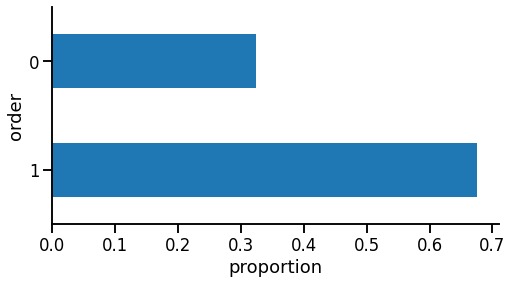

In [14]:
f, ax = plt.subplots(figsize=(8,4))

df_train['order'].value_counts(True).plot.barh(ax=ax);

plt.ylabel("order")
plt.xlabel("proportion")
sns.despine();

In [15]:
df_train['bStep'].value_counts()

-99.0    191333
 1.0      90058
 2.0      60682
 4.0      41142
 3.0      30062
 5.0      15736
Name: bStep, dtype: int64

In [16]:
df_train.iloc[0]

sessionNo              1
startHour            6.0
startWeekday         5.0
duration             0.0
cCount               1.0
cMinPrice          59.99
cMaxPrice          59.99
cSumPrice          59.99
bCount               1.0
bMinPrice          59.99
bMaxPrice          59.99
bSumPrice          59.99
bStep              -99.0
onlineStatus         -99
availability         -99
customerNo           1.0
maxVal             600.0
customerScore       70.0
accountLifetime     21.0
payments             1.0
age                 43.0
address              1.0
lastOrder           49.0
order                  1
Name: 0, dtype: object

Any potential outliers? Assumption for outliers:

- value < (Q1 - 1.5 * IQR), or
- value > (Q3 + 1.5 * IQR)

In [17]:
def check_outliers(series: pd.Series):
    """
    Return outlier flag and the number of outliers in the series.
    Outliers: if < Q1 - 1.5*IQR or > Q3 + 1.5*IQR
    """
    q1, q3 = np.percentile(series, q=[25, 75])
    iqr = q3 - q1
    lower_threshold = q1 - (1.5 * iqr)
    upper_threshold = q3 + (1.5 * iqr)
    conditions = [
        (series < lower_threshold) | (series > upper_threshold)
    ]
    choice = [1]
    outlier_flag_list = np.select(conditions, choice, default = 0)

    return outlier_flag_list, sum(outlier_flag_list)

In [18]:
numeric_column_list = df_train._get_numeric_data().columns
excluded_column_list = [
    'sessionNo','customerNo','address'
]
selected_column_list = numeric_column_list.drop(labels=excluded_column_list)

print("Number of outliers")
print("------------------------")
df_outliers = pd.DataFrame(
    data = {
        'colnames': [], 
        'outliers_count': [],
        'outliers_pct': []
    }
)

for col in selected_column_list:
    outlier_flag, outlier_count = check_outliers(df_train[col])
    df_train[col+"_is_outlier"] = outlier_flag
    
    new_df = pd.DataFrame(data = {
        'colnames': col, 
        'outliers_count': outlier_count, 
        'outliers_pct': outlier_count / df_train.shape[0]
    }, index = [0])
    df_outliers = pd.concat([df_outliers, new_df])
    
df_outliers.reset_index().drop(
    labels=['index'], 
    axis=1
).style.format({
    'outliers_count': '{:,.0f}',
    'outliers_pct': '{:,.2%}'
})

Number of outliers
------------------------


,colnames,outliers_count,outliers_pct
0,startHour,"3,630",0.85%
1,startWeekday,0,0.00%
2,duration,"35,625",8.30%
3,cCount,"33,970",7.92%
4,cMinPrice,"59,980",13.98%
5,cMaxPrice,"70,443",16.42%
6,cSumPrice,"45,186",10.53%
7,bCount,"25,780",6.01%
8,bMinPrice,"67,004",15.62%
9,bMaxPrice,"68,943",16.07%


In [19]:
SAVE_DATA = True

for col in ["order","address"]:
    df_train[col] = df_train[col].astype(int)
    
if SAVE_DATA:
    output_train_path = os.path.join(
        '..',
        'dataset',
        'research-iteration',
        'preprocessed',
        'transact_train.csv'
    )
    df_train.to_csv(output_train_path, index=False)

## Exploratory Analysis

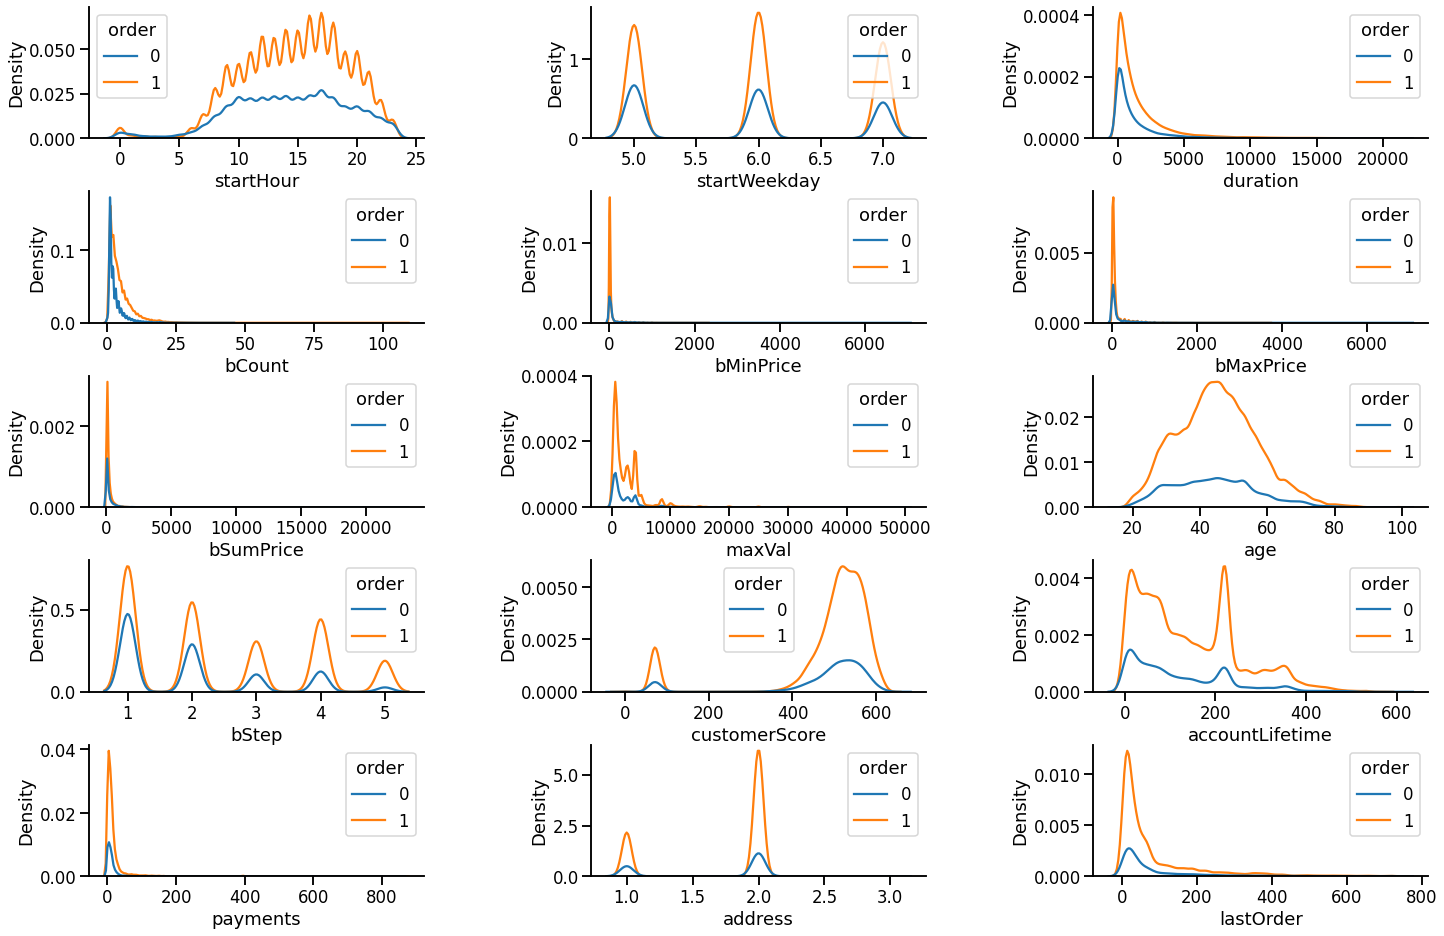

In [20]:
column_of_interest_list = [
    'startHour', 'startWeekday','duration', #'cCount','cMinPrice','cMaxPrice','cSumPrice',
    'bCount','bMinPrice','bMaxPrice','bSumPrice','maxVal','age','bStep',
    #     'availability','onlineStatus',
    'customerScore','accountLifetime',
    'payments','address','lastOrder'
]

f, ax = plt.subplots(figsize=(24,16), ncols=3, nrows=5)
plt.subplots_adjust(wspace=.5, hspace=.4)

row_idx = 0
col_idx = 0
for column_of_interest in column_of_interest_list:
    mask = (df_train[column_of_interest] != -99)
    sns.kdeplot(
        data=df_train[mask],
        x=column_of_interest,
        hue='order',
        ax=ax[row_idx][col_idx]
    )
#     ax[row_idx][col_idx].legend(loc='lower center', bbox_to_anchor=[.5,-.5], frameon=False, ncol=2)
    
    if (col_idx % 2 == 0) and (col_idx != 0):
        row_idx += 1
        col_idx = 0
    else:
        col_idx += 1

sns.despine();

**TO DO**

Check statistical significance for:
- duration: are sessions with longer duration more likely to check out their cart?
- age
- lastOrder: users who haven't purchased for a longer time tend to check out their cart?

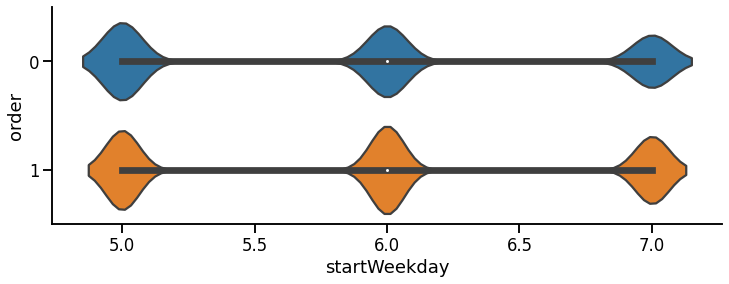

In [21]:
f, ax = plt.subplots(figsize=(12,4))

column_of_interest = 'startWeekday'
mask = (df_train[column_of_interest] != -99)
    
sns.violinplot(
    data=df_train[mask],
    x=column_of_interest,
    y='order',
    orient='h'
)
sns.despine();

In [22]:
df_train.iloc[0]

sessionNo                         1
startHour                       6.0
startWeekday                    5.0
duration                        0.0
cCount                          1.0
cMinPrice                     59.99
cMaxPrice                     59.99
cSumPrice                     59.99
bCount                          1.0
bMinPrice                     59.99
bMaxPrice                     59.99
bSumPrice                     59.99
bStep                         -99.0
onlineStatus                    -99
availability                    -99
customerNo                      1.0
maxVal                        600.0
customerScore                  70.0
accountLifetime                21.0
payments                        1.0
age                            43.0
address                           1
lastOrder                      49.0
order                             1
startHour_is_outlier              0
startWeekday_is_outlier           0
duration_is_outlier               0
cCount_is_outlier           

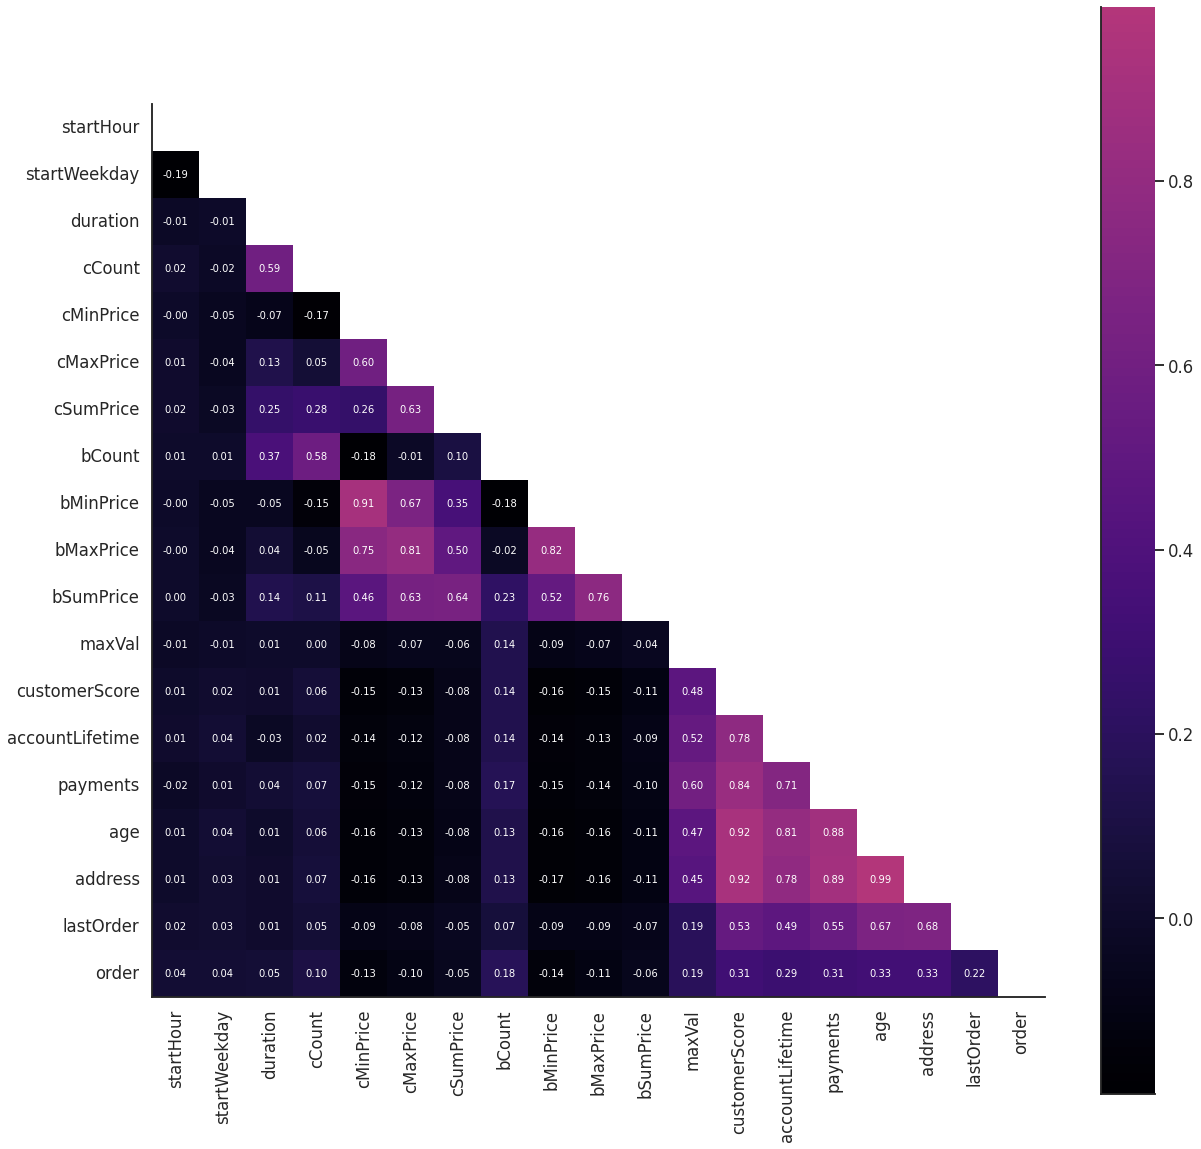

In [24]:
selected_column_list = [
    "startHour","startWeekday","duration",
    "cCount","cMinPrice","cMaxPrice","cSumPrice",
    "bCount","bMinPrice","bMaxPrice","bSumPrice",
    "onlineStatus","maxVal","customerScore","accountLifetime",
    "payments","age","address","lastOrder","order"
]

## create mask to hide upper triangle
mask = np.zeros_like(df_train[selected_column_list].corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(
        df_train[selected_column_list].corr(),
        mask=mask,
        center=True,
        annot=True,
        annot_kws={'size': 10},
        fmt='.2f',
        square=True,
        cmap='magma',
        ax=ax
    )
    sns.despine();